In [1]:
import numpy as np
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
%matplotlib inline

# Data

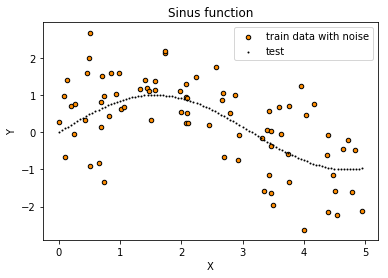

In [2]:
# Create a random dataset
np.random.seed(1)
train_size = 80
X_train = np.sort(5 * np.random.rand(train_size, 1), axis=0)
y_train = np.sin(X_train).ravel()
noise = np.random.randn(train_size)
y_train += noise

X_test = np.arange(0.0, 5.0, 0.05)[:, np.newaxis]
y_test = np.sin(X_test).ravel()


plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="train data with noise")
plt.scatter(X_test, y_test, s=1, edgecolor="black", c="black", label="test")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sinus function")
plt.legend()
plt.show()

# Baseline

In [3]:
from sklearn.metrics import mean_squared_error
models_errors = {}

average_train = y_train.mean()
y_pred = np.ones_like(y_test) * average_train
model_mse = mean_squared_error(y_test, y_pred)
models_errors['Baseline'] = model_mse
model_mse

0.5106686715682321

# Linear Regressor

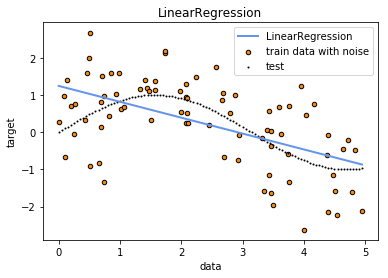

LinearRegression mean squared error is 0.1835


In [4]:
def check_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit regression model
    regressor.fit(X_train, y_train)

    # Predict
    y_pred = regressor.predict(X_test)

    # Plot the results
    plt.figure()
    plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="train data with noise")
    plt.scatter(X_test, y_test, s=1, edgecolor="black", c="black", label="test")

    model_name = regressor.__class__.__name__
    plt.plot(X_test, y_pred, color="cornflowerblue", label=model_name, linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    
    plt.title("{0}".format(model_name))
    plt.legend()
    plt.show()


    mse = mean_squared_error(y_test, y_pred)
    print('{0} mean squared error is {1:.4f}'.format(model_name, mse))
    return mse

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
model_mse = check_regressor(linear_regressor, X_train, y_train, X_test, y_test)
model_name = linear_regressor.__class__.__name__
models_errors[model_name] = model_mse

# Nearest Neighbors Regressor

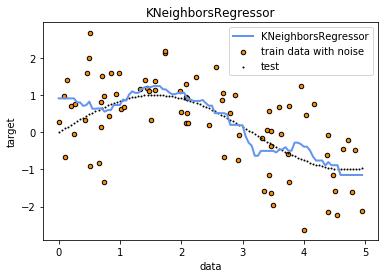

KNeighborsRegressor mean squared error is 0.0772


In [5]:
from sklearn.neighbors import KNeighborsRegressor

# k = 11
k = 11
nearest_neighbors = KNeighborsRegressor(k)
model_mse = check_regressor(nearest_neighbors, X_train, y_train, X_test, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mse

# Decision Tree Regressor

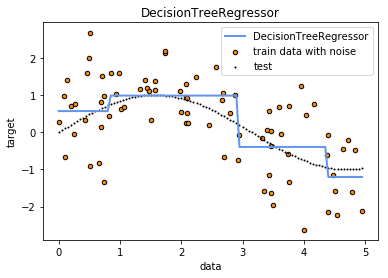

DecisionTreeRegressor mean squared error is 0.0920


In [6]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 2
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mse = check_regressor(decision_tree, X_train, y_train, X_test, y_test)
model_name = decision_tree.__class__.__name__
models_errors[model_name] = model_mse

### Visualize Tree

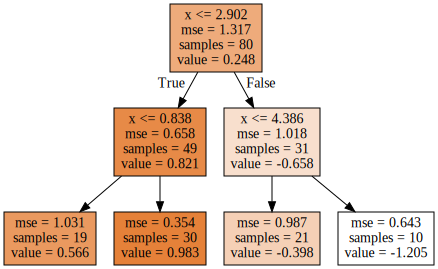

In [7]:
def visualize_tree(tree, features):
    graph = Source(export_graphviz(tree, feature_names=features, filled = True))
    display(SVG(graph.pipe(format='svg')))
    
visualize_tree(decision_tree, features=['x'])

# Random Forest Regressor

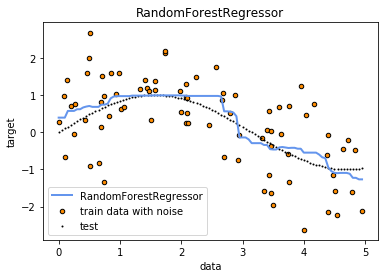

RandomForestRegressor mean squared error is 0.0446


In [8]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
max_depth = 2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_mse = check_regressor(random_forest, X_train, y_train, X_test, y_test)
model_name = random_forest.__class__.__name__
models_errors[model_name] = model_mse

# Performance Comparision

In [9]:
import pandas as pd
pd.Series(models_errors, name='mean squared error').sort_values().to_frame()

,mean squared error
RandomForestRegressor,0.044621
KNeighborsRegressor,0.077207
DecisionTreeRegressor,0.091955
LinearRegression,0.183537
Baseline,0.510669
